
# Load processed data


In [ ]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
raw_data = pd.read_csv("/content/drive/MyDrive/codeAndData/data/SA.csv")

Mounted at /content/drive


In [ ]:
#scale dependent variables
raw_data.SWB = (raw_data.SWB)/20
raw_data.Positive_affect = (raw_data.Positive_affect-5)/20
raw_data.Negative_affect = (raw_data.Negative_affect-5)/20

## Toic modelling

In [ ]:
import spacy
import re
import string

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")


# Example tweet data (assuming `raw_data['OriginalText']` exists)
tweets = raw_data['OriginalText'].tolist()

delete_words = ['not', 'n', 'amp', 'rt', 'k','nd','hey','gt','ok','don','okay','yo','couldn','doesn','didn']

# Function to clean the tweet
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)

    tweet = re.sub(r"@\w+", "", tweet)
    tweet = re.sub(r"#(\w+)", r"\1", tweet)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    tweet = re.sub(r'[^\w\s]', ' ', tweet)
    tweet = tweet.lower()
    tweet = " ".join(tweet.split())
    return tweet

def process_tweet_for_lda(tweet):
    # Clean the tweet text
    clean_text = clean_tweet(tweet)
    # Process the cleaned tweet using spaCy NLP pipeline
    doc = nlp(clean_text)

    # Step 1: Filter tokens by basic conditions (length, stop words, punctuation, and remove numbers)
    filtered_tokens = [
        token.lemma_
        for token in doc
        if len(token.text) > 1 and not token.is_stop and not token.is_punct and not token.is_digit
    ]

    final_tokens = [token for token in filtered_tokens if token not in delete_words]

    return final_tokens



In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel
import numpy as np
import pandas as pd
import gensim
from gensim import corpora


processed_docs = [process_tweet_for_lda(tweet) for tweet in tweets]


# Create dictionary and BOW corpus
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]


K_values = list(range(2, 21))


# List to store results
results = []

for K in K_values:
    # Train the LDA model
    lda_model = LdaModel(
        corpus=corpus_tfidf,
        id2word=dictionary,
        num_topics=K,

        passes=10,
        random_state=42
    )

    coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    results.append({'num_topics': K, 'coherence_score': coherence_score})
    print(f"K={K}, coherence={coherence_score}")

best_result = max(results, key=lambda x: x['coherence_score'])
print("Best Number of Topics:")
print(best_result)


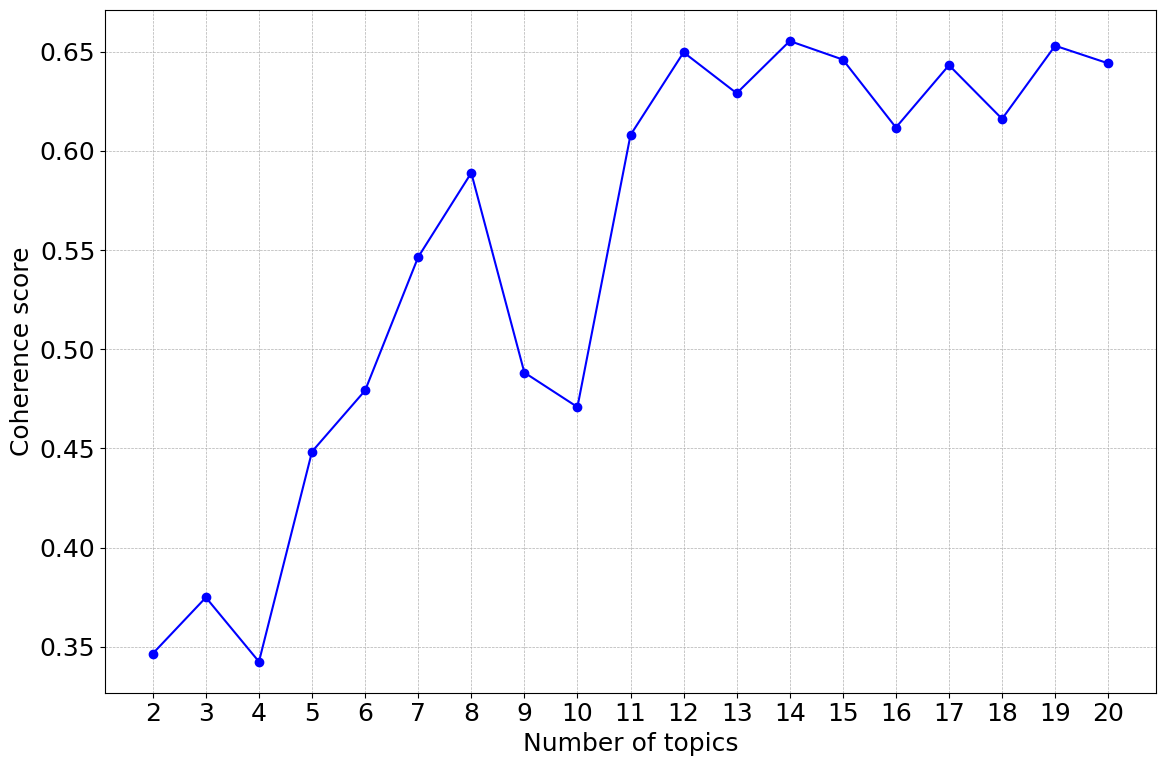

In [ ]:
import matplotlib.pyplot as plt

# Sample data
num_topics = [result['num_topics'] for result in results]
coherence_scores = [result['coherence_score'] for result in results]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 8))
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='b', label='Coherence score')
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.xticks(num_topics)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel
import numpy as np
import pandas as pd
import gensim
from gensim import corpora

lda_model = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=14,
    passes=10,
    random_state=42
)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.004*"sit" + 0.003*"attend" + 0.003*"beer" + 0.003*"sadly" + 0.003*"small" + 0.003*"pub" + 0.003*"single" + 0.003*"tough" + 0.003*"america" + 0.003*"american"
Topic 2: 0.007*"anti" + 0.005*"appointment" + 0.004*"block" + 0.004*"covid19india" + 0.003*"conference" + 0.003*"relief" + 0.003*"brilliant" + 0.003*"nearly" + 0.003*"realise" + 0.003*"federal"
Topic 3: 0.009*"moderna" + 0.005*"date" + 0.004*"card" + 0.004*"choice" + 0.004*"mrna" + 0.004*"mandatory" + 0.003*"text" + 0.003*"stat" + 0.003*"deny" + 0.003*"rapid"
Topic 4: 0.004*"volunteer" + 0.003*"here" + 0.003*"responsibility" + 0.003*"taste" + 0.003*"bloody" + 0.003*"terrible" + 0.003*"petition" + 0.003*"crowd" + 0.003*"song" + 0.002*"wednesday"
Topic 5: 0.006*"coronavirus" + 0.005*"covid19" + 0.005*"test" + 0.005*"people" + 0.005*"school" + 0.004*"know" + 0.004*"covid" + 0.004*"wonder" + 0.004*"vaccine" + 0.004*"lie"
Topic 6: 0.005*"arm" + 0.004*"sore" + 0.003*"freedom" + 0.003*"university" + 0.003*"zero" + 0.003*"react

In [ ]:
topics = {}

# Loop through each topic from the lda_model
for idx, topic in lda_model.print_topics(-1):
    topic_str = topic.replace(' + ', ' + ')  # Ensure proper formatting for ' + '

    topics[idx + 1] = topic_str

# Print the topics dictionary
print(topics)


{1: '0.004*"sit" + 0.003*"attend" + 0.003*"beer" + 0.003*"sadly" + 0.003*"small" + 0.003*"pub" + 0.003*"single" + 0.003*"tough" + 0.003*"america" + 0.003*"american"', 2: '0.007*"anti" + 0.005*"appointment" + 0.004*"block" + 0.004*"covid19india" + 0.003*"conference" + 0.003*"relief" + 0.003*"brilliant" + 0.003*"nearly" + 0.003*"realise" + 0.003*"federal"', 3: '0.009*"moderna" + 0.005*"date" + 0.004*"card" + 0.004*"choice" + 0.004*"mrna" + 0.004*"mandatory" + 0.003*"text" + 0.003*"stat" + 0.003*"deny" + 0.003*"rapid"', 4: '0.004*"volunteer" + 0.003*"here" + 0.003*"responsibility" + 0.003*"taste" + 0.003*"bloody" + 0.003*"terrible" + 0.003*"petition" + 0.003*"crowd" + 0.003*"song" + 0.002*"wednesday"', 5: '0.006*"coronavirus" + 0.005*"covid19" + 0.005*"test" + 0.005*"people" + 0.005*"school" + 0.004*"know" + 0.004*"covid" + 0.004*"wonder" + 0.004*"vaccine" + 0.004*"lie"', 6: '0.005*"arm" + 0.004*"sore" + 0.003*"freedom" + 0.003*"university" + 0.003*"zero" + 0.003*"reaction" + 0.003*"track

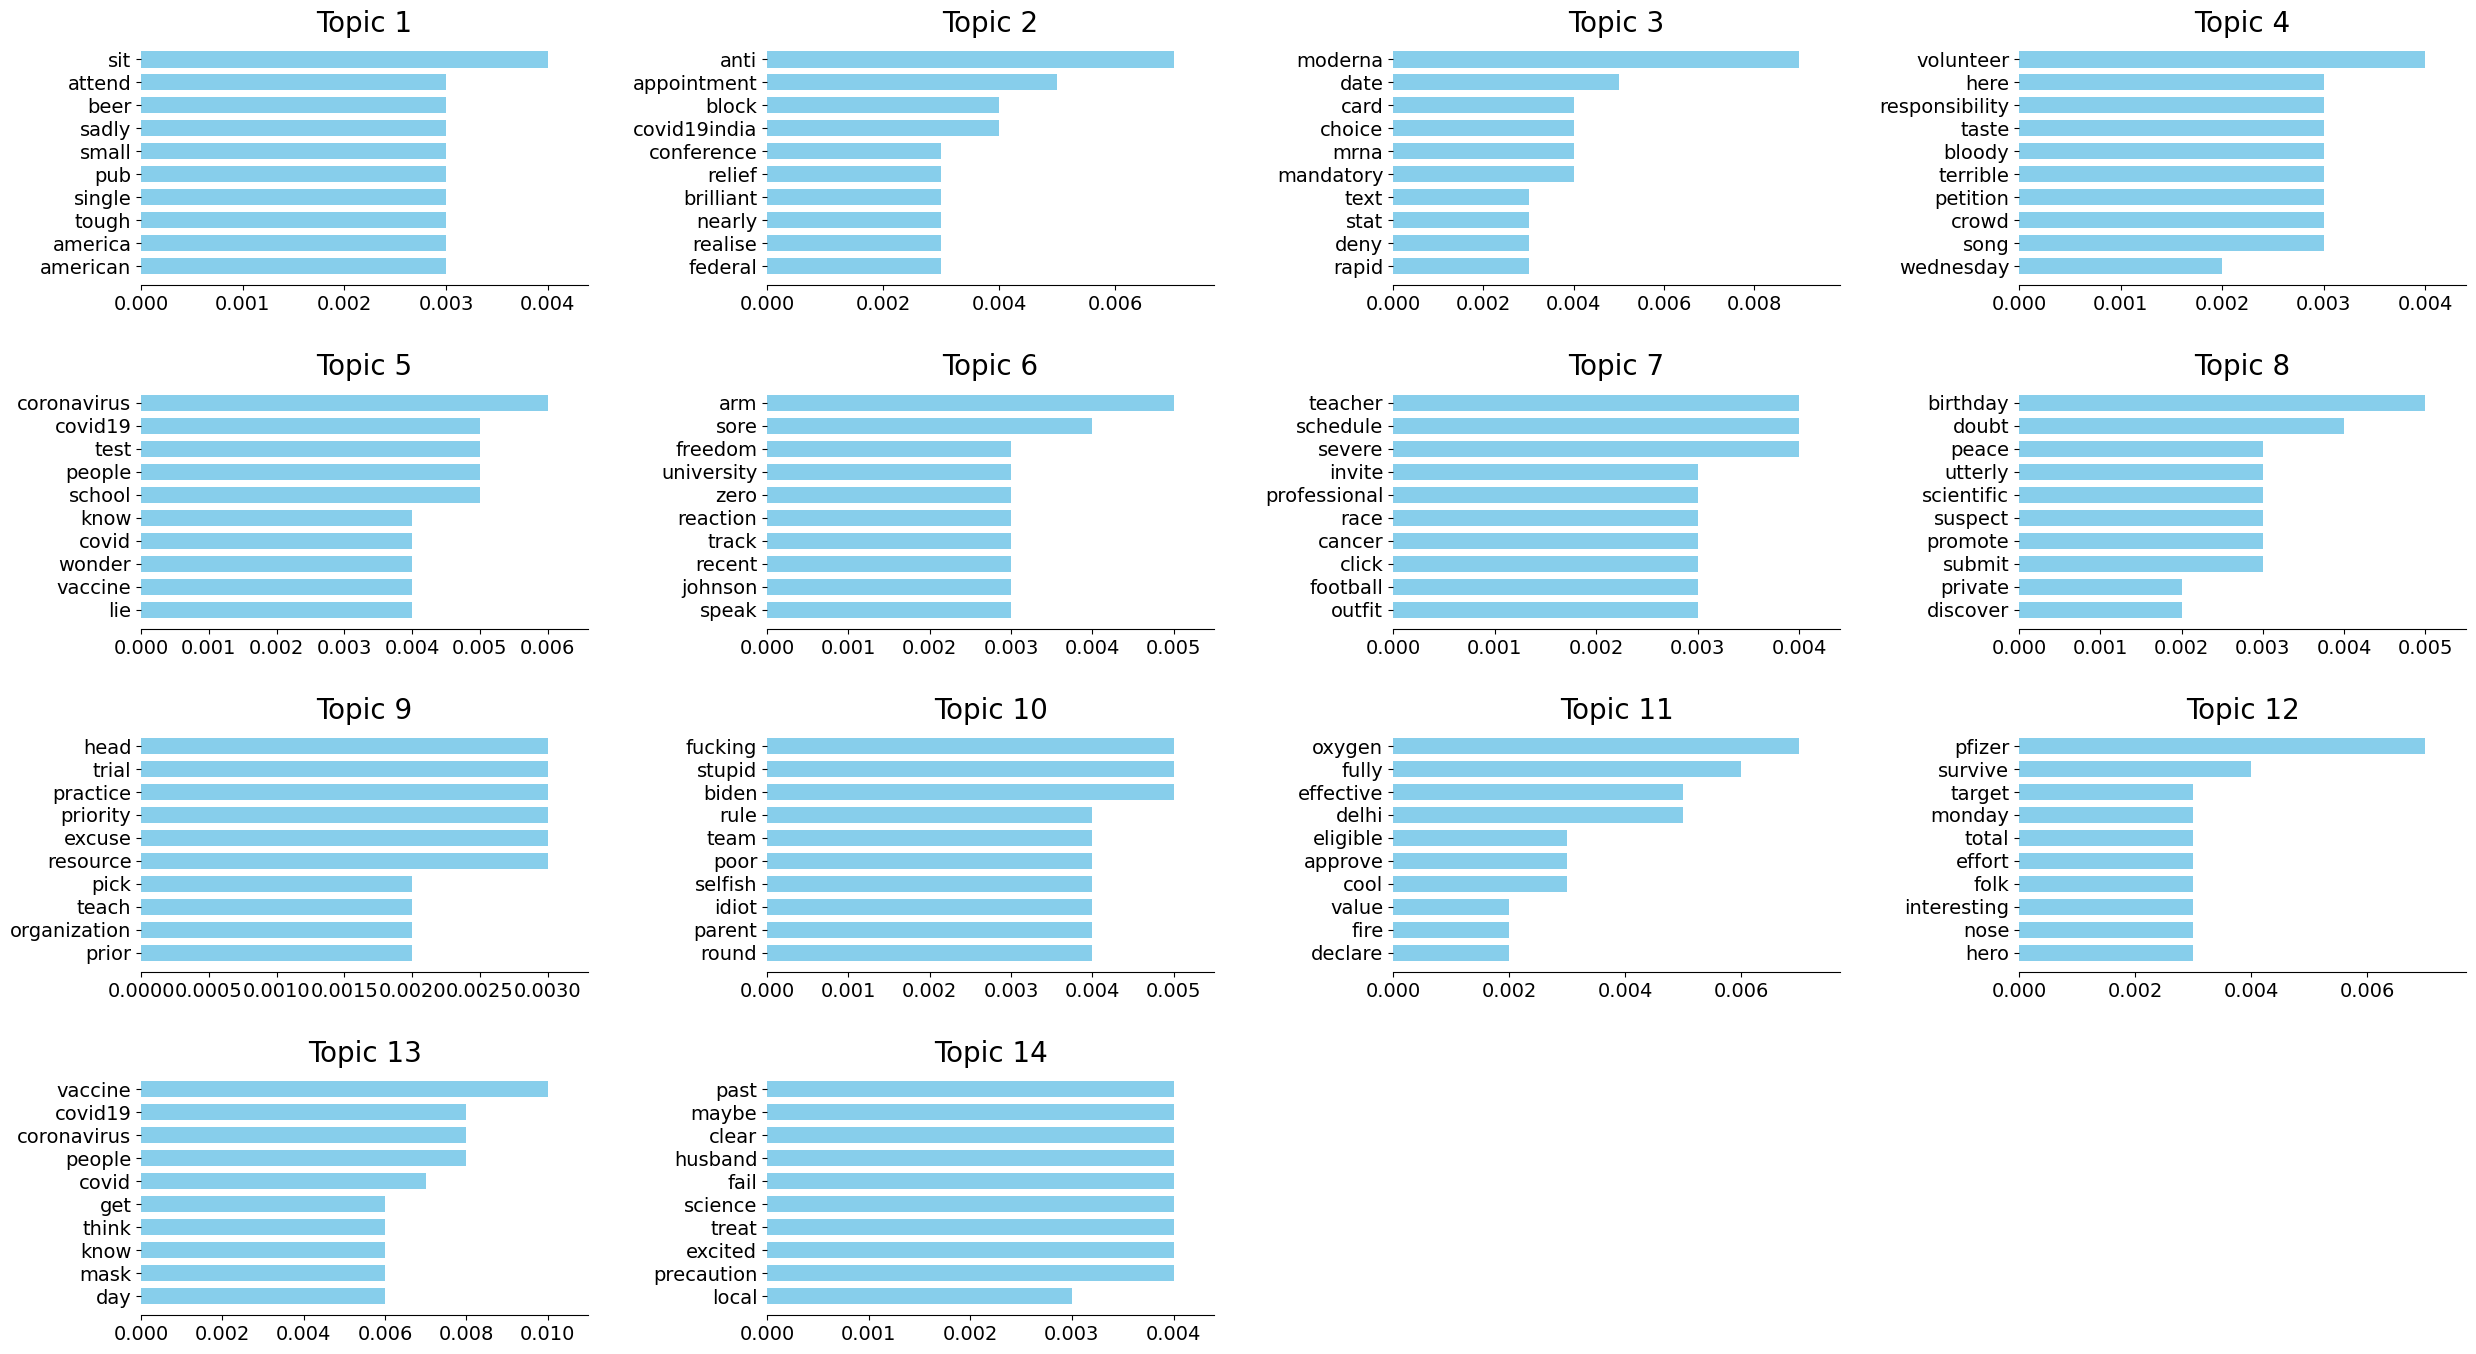

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def extract_words_and_weights(topic):
    """
    Extract words and their corresponding weights from a topic string.
    """
    items = topic.split(" + ")
    words = []
    weights = []
    for item in items:
        weight, word = item.split("*")
        weights.append(float(weight))
        words.append(word.strip('"'))
    return words, weights

def plot_top_words(topics, n_top_words=10):

    n_topics = len(topics)
    n_cols = 4
    n_rows = (n_topics + n_cols - 1) // n_cols  # Calculate number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15), sharey=False)

    axes = axes.flatten()

    for idx, (topic_idx, topic) in enumerate(topics.items()):
        words, weights = extract_words_and_weights(topic)
        words, weights = words[:n_top_words], weights[:n_top_words]

        ax = axes[idx]
        ax.barh(words, weights, height=0.7, color='skyblue')
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=14)

        ax.set_xlim(0, max(weights) * 1.1)

        for spine in ["top", "right", "left"]:
            ax.spines[spine].set_visible(False)

    # Remove unused subplots
    for ax in axes[len(topics):]:
        fig.delaxes(ax)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.4, hspace=0.4)
    plt.show()

# Plot the topics
plot_top_words(topics, n_top_words=10)


In [ ]:

# Store the dominant topic for each tweet along with the tweet index
tweet_topic_mapping = []

for idx, tweet in enumerate(corpus_tfidf):
    # Get the topic distribution for the current tweet
    topics = lda_model.get_document_topics(tweet)
    # Find the topic with the highest probability
    dominant_topic = max(topics, key=lambda x: x[1])[0]+1
    # Append a tuple of (tweet index, dominant topic)
    tweet_topic_mapping.append(dominant_topic)



In [ ]:
raw_data['tweet_topic'] = tweet_topic_mapping

In [ ]:
# Summary statistics
import pandas as pd

median_data = raw_data.groupby('tweet_topic')[['SWB', 'Positive_affect', 'Negative_affect']].median()

ranked_data = raw_data.groupby('tweet_topic')[['SWB', 'Positive_affect', 'Negative_affect']].rank()

# Display the median values and the rank of each component within each group
print("Median Values by Group:")
print(median_data)



Median Values by Group:
                SWB  Positive_affect  Negative_affect
tweet_topic                                          
1           -0.0375           0.1500           0.1750
2           -0.0375           0.2125           0.1875
3           -0.1625           0.1375           0.2000
4           -0.0125           0.1625           0.2000
5           -0.1250           0.1500           0.2250
6            0.0000           0.2000           0.1750
7           -0.1250           0.1500           0.2000
8           -0.0750           0.1000           0.2000
9            0.0750           0.2375           0.1500
10          -0.0750           0.1000           0.2000
11           0.2000           0.2250           0.1000
12           0.1000           0.2000           0.1250
13          -0.0250           0.2000           0.2000
14           0.0000           0.2250           0.1750


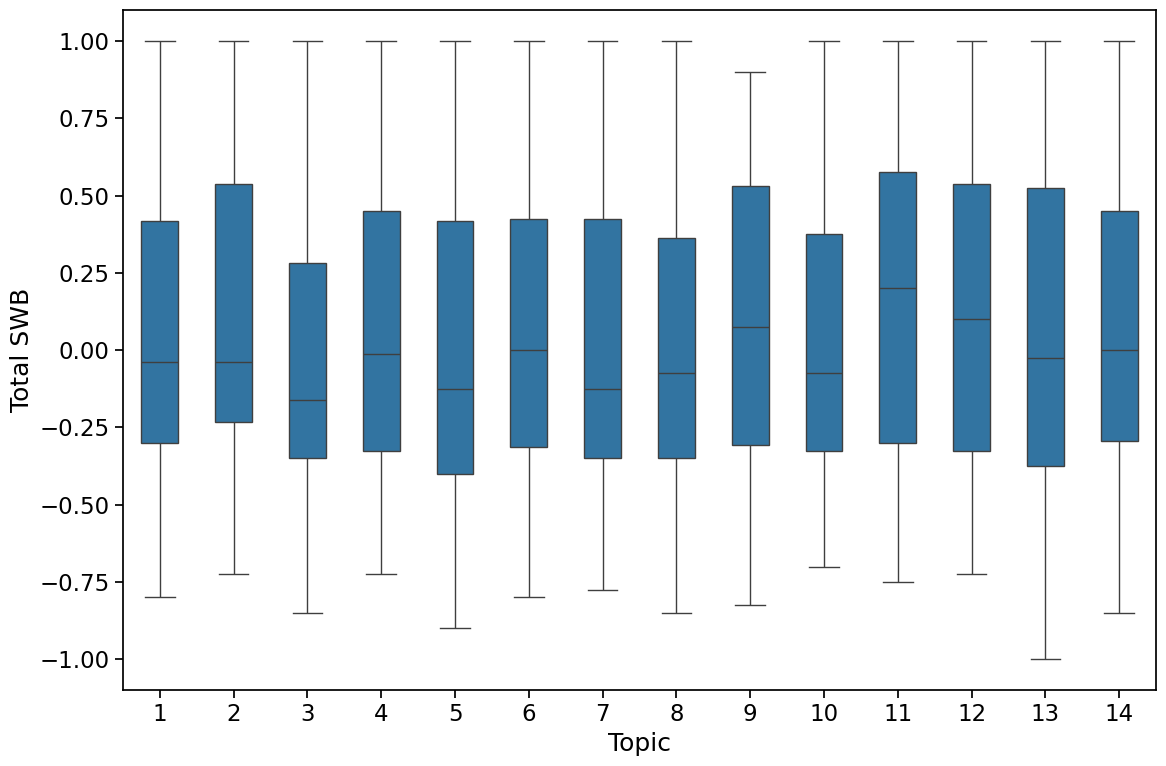

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(x='tweet_topic', y='SWB', data=raw_data, widths=0.5)

plt.xlabel('Topic', fontsize=18)
plt.ylabel('Total SWB', fontsize=18)
plt.tight_layout()
plt.show()



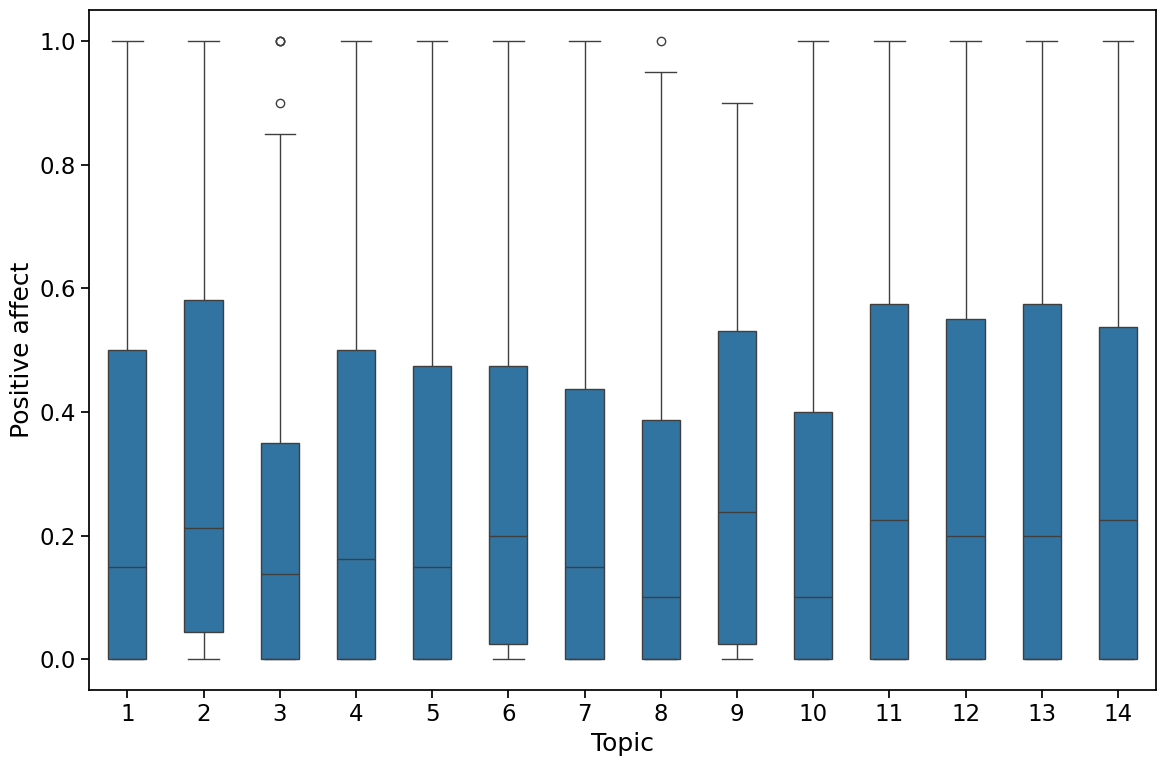

In [ ]:


plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(x='tweet_topic', y='Positive_affect', data=raw_data, widths=0.5)

plt.xlabel('Topic', fontsize=18)
plt.ylabel('Positive affect', fontsize=18)
plt.tight_layout()
plt.show()

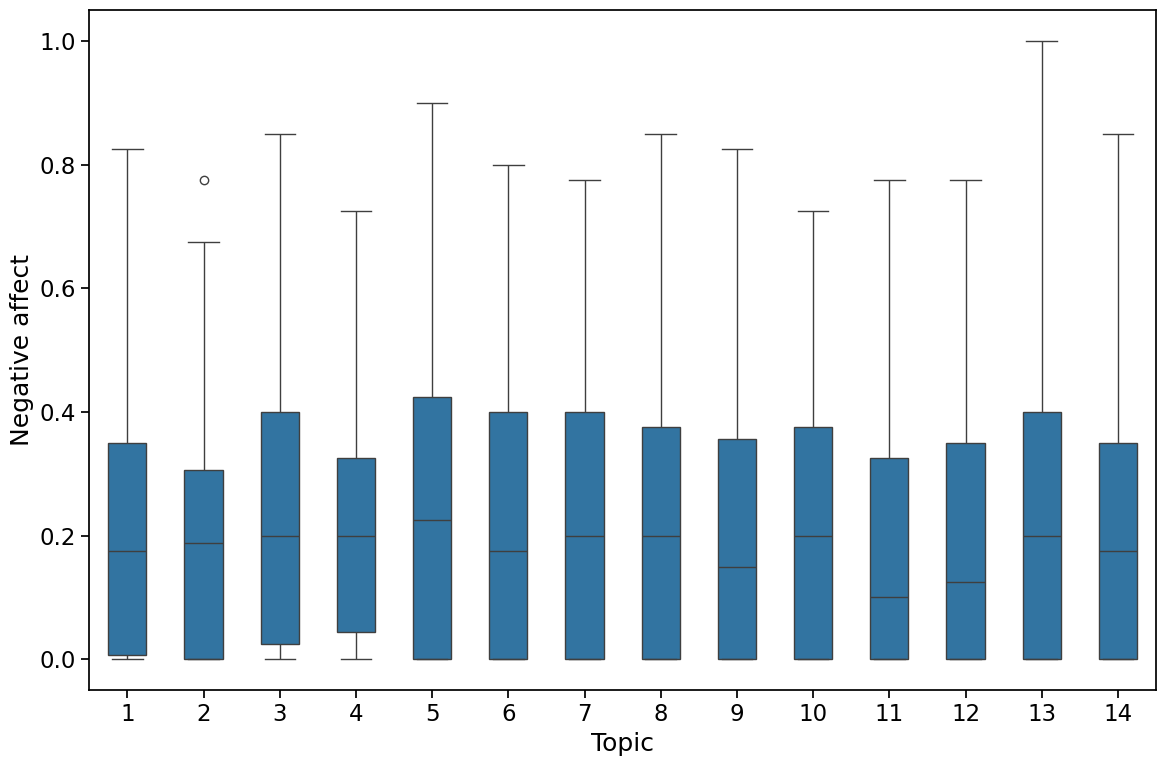

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_context("notebook", font_scale=1.5)
sns.boxplot(x='tweet_topic', y='Negative_affect', data=raw_data, widths=0.5)

plt.xlabel('Topic', fontsize=18)
plt.ylabel('Negative affect', fontsize=18)
plt.tight_layout()
plt.show()